
#### 爬虫过程
输入电影的电影名、id或链接，模拟登陆爬取五百条短评，存到一个txt文件里，利用jieba、wordcloud和pyplot生成词云，利用Snownlp和pyplot对短评进行情感分析并展示。

In [12]:
import json
import requests
# 定义请求url
url = "https://movie.douban.com/j/search_subjects"
# 定义请求头
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36"
}
# 循环构建请求参数并且发送请求
for page_start in range(0, 100, 20):
    params = {
        "type": "movie",
        "tag": "热门",
        "sort": "recommend",
        "page_limit": "20",
        "page_start": page_start
    }
    response = requests.get(
        url=url,
        headers=headers,
        params=params
    )
    # 方式一:直接转换json方法
    # results = response.json()
    # 方式二: 手动转换
    # 获取字节串
    content = response.content
    # 转换成字符串
    string = content.decode('utf-8')
    # 把字符串转成python数据类型
    results = json.loads(string)
    # 解析结果
    for movie in results["subjects"]:
        print(movie["id"],movie["title"], movie["rate"])

27119724 小丑 9.0
26709258 罗小黑战记 8.2
30359970 鬼镇事件簿 6.4
30320204 完美男人 6.3
27002647 惊魂鬼屋 6.3
30372377 续命之徒：绝命毒师电影 8.1
30235440 小小的愿望 5.1
26794435 哪吒之魔童降世 8.5
27010768 寄生虫 8.7
27180759 送我上青云 7.2
30299356 友情以上 6.3
3882427 我在雨中等你 8.1
27115166 好小子们 7.2
30390144 别告诉她 7.6
27133569 小丑回魂2 6.4
26884354 狮子王 7.4
25779217 诛仙 Ⅰ 4.9
27166976 安娜 7.7
25986662 疯狂的外星人 6.4
27110296 无名之辈 8.1
30211551 恶人传 7.7
30221757 烈火英雄 6.6
26266893 流浪地球 7.9
30282387 银河补习班 6.3
30208010 名侦探柯南：绀青之拳 6.0
30163509 飞驰人生 6.9
30225296 柳烈的音乐专辑 7.9
30376977 小Q 6.7
30481973 决胜时刻 6.7
30143698 兰开斯特之王 6.3
6850547 玩具总动员4 8.7
26278747 在黑暗中讲述的恐怖故事 6.1
3878007 海王 7.6
30210691 极限逃生 7.6
26715636 地久天长 8.0
30331149 白蛇：缘起 7.9
26374197 蜘蛛侠：平行宇宙 8.6
27035542 花生酱猎鹰 7.6
1652592 阿丽塔：战斗天使 7.5
26863060 愤怒的小鸟2 7.1
30288638 仲夏夜惊魂 6.5
27594856 金发男子 8.0
27163278 速度与激情：特别行动 6.3
27088750 我身体里的那个家伙 7.2
26810068 冷血追击 6.7
26931786 蜘蛛侠：英雄远征 7.8
26935296 花椒之味 7.2
26909790 疾速备战 7.8
26835471 大侦探皮卡丘 6.5
30249076 坏家伙们 6.5
26147417 神奇动物：格林德沃之罪 7.1
26667010 X战警：黑凤凰 5.8

In [ ]:
# 电影链接
# url = https://movie.douban.com/subject/${movieId}
 # 流浪地球  26266893

In [1]:
import requests

# 生成Session对象，用于保存Cookie
s = requests.Session()
def login_douban():
    """
    登录豆瓣
    :return:
    """
    # 登录URL
    login_url = 'https://accounts.douban.com/j/mobile/login/basic'
    # 请求头
    headers = {'user-agent': 'Mozilla/5.0', 'Referer': 'https://accounts.douban.com/passport/login?source=main'}
    # 传递用户名和密码
    data = {'name': '18576418732',
            'password': 'zpf123456789',
            'remember': 'false'}
    try:
        r = s.post(login_url, headers=headers, data=data)
        r.raise_for_status()
    except:
        print('登录请求失败')
        return 0
    # 打印请求结果
    print(r.text)
    return 1

In [2]:
login_douban()

{"status":"success","message":"success","description":"处理成功","payload":{"account_info":{"name":"大鹏哥看世界","weixin_binded":false,"phone":"18576418732","avatar":{"medium":"https://img3.doubanio.com\/icon\/up146669904-1.jpg","median":"https://img3.doubanio.com\/icon\/us146669904-1.jpg","large":"https://img3.doubanio.com\/icon\/ul146669904-1.jpg","raw":"https://img3.doubanio.com\/icon\/ur146669904-1.jpg","small":"https://img3.doubanio.com\/icon\/u146669904-1.jpg","icon":"https://img3.doubanio.com\/icon\/ui146669904-1.jpg"},"id":"146669904","uid":"146669904"}}}


1

In [ ]:
# 影评链接
# https://movie.douban.com/subject/${movieId}/reviews?start=20

In [3]:
# https://www.xicidaili.com/
 
#获取网页源代码的框架
def getHtml(URL):
    try:
        headers = {
           # "Referer":"https://movie.douban.com/subject/26266893/?from=showing",
            "User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.26 Safari/537.36 Core/1.63.6788.400 QQBrowser/10.3.2864.400",
#            'Cookie':'bid=dBLxsRMMRbs; __utmc=30149280; __utmc=223695111; ll="118184"; push_noty_num=0; push_doumail_num=0; __utmv=30149280.19232; _vwo_uuid_v2=DD9A4D81803D3AC581031A21E0B6F1628|eb32f81d72deea36fe07c889241a8846; _pk_ses.100001.4cf6=*; ap_v=0,6.0; __utma=30149280.219998368.1550975340.1550979553.1550999110.3; __utmz=30149280.1550999110.3.2.utmcsr=movie.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/subject/26266893/reviews; dbcl2="192325248:8Qm6nZGk5Co"; ck=n3HL; __utma=223695111.1281168398.1550975340.1550979553.1550999422.3; __utmb=223695111.0.10.1550999422; __utmz=223695111.1550999422.3.2.utmcsr=accounts.douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/passport/login; __utmt=1; gr_user_id=95b206b3-7bf4-40ca-94d8-14f39be020e1; gr_session_id_22c937bbd8ebd703f2d8e9445f7dfd03=1b9e9583-a672-486f-8b8d-7c6a6ba6294b; gr_cs1_1b9e9583-a672-486f-8b8d-7c6a6ba6294b=user_id%3A1; gr_session_id_22c937bbd8ebd703f2d8e9445f7dfd03_1b9e9583-a672-486f-8b8d-7c6a6ba6294b=true; __utmt_douban=1; __utmb=30149280.7.10.1550999110; _pk_id.100001.4cf6=138e377200b95457.1550975332.3.1551000296.1550979600.'
        }
        proxies = {
            'http': '113.120.37.239:9999',
            'http': '120.83.121.160:9999'
         }
        response = s.get(URL,headers = headers,proxies=proxies,timeout=5)
        response.raise_for_status()
        response.encoding = response.apparent_encoding
        return response.content.decode("utf-8")
    except:
        return "爬取失败"


In [4]:

from lxml import etree
import time
#获取评论的URL并且获得用户名，用户评分，用户所在地区以及用户加入豆瓣时间
def get_all_info(page): 
    #把这一页的所有信息存入一个列表，便于后续的存入数据库
    all_info = []
    html = etree.HTML(page)
    #获取评论的URL
    com_urls = html.xpath("//a[@class = 'reply ']/@href")
    #获取作者的URL
    user_url = html.xpath("//header[@class = 'main-hd']//a[1]/@href") 
    #在获取评论的页面中获取用户评分
    user_score = html.xpath("//header[@class = 'main-hd']//span[1]/@title")
    # 在获取评论的页面中获取用户发布时间
    release_time = html.xpath("//header[@class = 'main-hd']//span[2]/text()")
    if len(user_url) != len(user_score):
        print("这个界面出现了问题，直接爬取下一个界面")
        return False
 
    for i in range(len(user_url)):
        #print("正在爬取这一页中的第{}个用户信息".format(i+1))
 
        #将所有的信息存入字典
        all_dict = {}
 
        #获取用户的评论
        res = getHtml(com_urls[i])
        time.sleep(1)
        html = etree.HTML(res)
        comments = html.xpath("//div[@id = 'link-report']//p/text()")
        new_comment = "".join(comments)
        #获取用户的基本信息
        res = getHtml(user_url[i])
        time.sleep(1)
        new_html = etree.HTML(res)
        #获取用户名
        user_name = new_html.xpath("//div[@class = 'info']//h1/text()")[0].strip()
        #获取用户的创建时间
        user_creat_time = new_html.xpath("//div[@class = 'user-info']//div[@class = 'pl']/text()")[1].strip()
        #获取用户的地址
        try:
            user_addr = new_html.xpath("//div[@class = 'user-info']//a/text()")[0].strip()
        except:
            user_addr = "用户没有填写"
 
        #把所有的数据先存入字典
        all_dict["user_name"] = user_name
        all_dict["user_creat_time"] = user_creat_time
        all_dict["user_addr"] = user_addr
        all_dict["user_score"] = user_score[i]
        all_dict["new_comment"] = new_comment
        all_dict["release_time"] = release_time[i]
        all_info.append(all_dict)
        #print(all_dict["user_name"])
    return all_info


In [10]:
for i in range(3):
    print("---------------正在爬取第{}页的评论的URL---------------".format(i+1))
    URL = "https://movie.douban.com/subject/26266893/reviews?start="+str(i*20)
    page = getHtml(URL)
    time.sleep(1)
    single_data = get_all_info(page)
     # 写入文件
    with open('snowNLP/result.txt', 'a+', encoding="utf-8") as file:
        
        if single_data == False:
            continue
        for item in single_data:
            #file.writelines('\n'.join(item['new_comment']))
            file.writelines(item['new_comment'])
            


---------------正在爬取第1页的评论的URL---------------
---------------正在爬取第2页的评论的URL---------------
---------------正在爬取第3页的评论的URL---------------
这个界面出现了问题，直接爬取下一个界面


### 生成词云

In [11]:
import jieba
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def cut_word():
    with open('snowNLP/result.txt', 'r', encoding='utf-8') as file:
        # 读取文件里面的全部内容
        comment_txt = file.read()
        # 使用jieba进行分割
        wordlist = jieba.cut(comment_txt)
        print('***********',wordlist)
        wl = "/".join(wordlist)
        # print(wl)
        return wl


def create_word_cloud():
    # 设置词云形状图片,numpy+PIL方式读取图片
    wc_mask = np.array(Image.open('snowNLP/background.jpg'))
    # 数据清洗词列表
    stop_words = ['就是', '不是', '但是', '还是', '只是', '这样','可以','因为', '这个', '一个', '什么', '电影', '没有']
    # 设置词云的一些配置，如：字体，背景色，词云形状，大小,生成词云对象
    wc = WordCloud(mask=wc_mask, background_color="white", stopwords=stop_words, max_words=50, scale=4,
                   max_font_size=50, random_state=42,font_path="C:/Windows/Fonts/STFANGSO.TTF")
    # 生成词云
    wc.generate(cut_word())

    # 在只设置mask的情况下,你将会得到一个拥有图片形状的词云
    # 开始画图
    plt.imshow(wc, interpolation="bilinear")
    # 为云图去掉坐标轴
    plt.axis("off")
    plt.figure()
    plt.show()

*********** <generator object Tokenizer.cut at 0x000001B2FA4BE5C8>


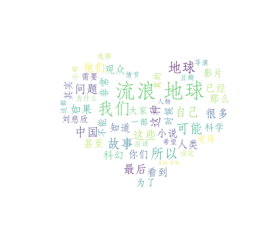

<Figure size 432x288 with 0 Axes>

In [12]:
create_word_cloud()

### 生成情感分析表

In [8]:
from snownlp import SnowNLP
from matplotlib.font_manager import FontProperties

def data_show():
    with open('snowNLP/result.txt', 'r', encoding='UTF-8') as f:
        list = f.readlines()
        sentimentslist = []
        for i in list:
            s = SnowNLP(i)
            sentimentslist.append(s.sentiments)
        print(sentimentslist)
        print(len(sentimentslist))
        myfont = FontProperties(fname='C:/Windows/Fonts/STFANGSO.TTF')
        plt.hist(sentimentslist, bins=10, facecolor='g')
        plt.xlabel('情感概率', fontproperties= myfont)
        plt.ylabel('数量', fontproperties= myfont)
        plt.title('情感分析', fontproperties= myfont)
        plt.show()

[1.0, 0.5262327818078083, 1.0, 0.5262327818078083, 1.0, 1.0, 0.5262327818078083, 0.8595057665992633, 0.5262327818078083, 0.9239000699053471, 0.5262327818078083, 1.0, 0.5262327818078083, 0.9999983587244758, 1.0, 1.0, 0.5262327818078083, 0.5262327818078083, 0.9999998226180963, 0.9885437938739827, 0.9999999980650562, 0.9999999593246488, 1.0, 1.0, 0.5715428546715309, 0.9999999999690419, 1.0, 1.0, 0.5262327818078083, 1.0, 1.0, 0.002092956405004398, 0.6586127333903321, 0.9398890659145469, 0.9999972169611155, 0.9999999645042831, 1.0, 0.5262327818078083, 1.0, 0.5262327818078083, 1.0, 1.0, 0.5262327818078083, 0.8595057665992633, 0.5262327818078083, 0.9239000699053471, 0.5262327818078083, 1.0, 0.5262327818078083, 0.9999983587244758, 1.0, 1.0, 0.5262327818078083, 0.5262327818078083, 0.9999998226180963, 0.9885437938739827, 0.9999999980650562, 0.9999999593246488, 1.0, 1.0, 0.5715428546715309, 0.9999999999690419, 1.0, 1.0, 0.5262327818078083, 1.0, 1.0, 0.002092956405004398, 0.6586127333903321, 0.939

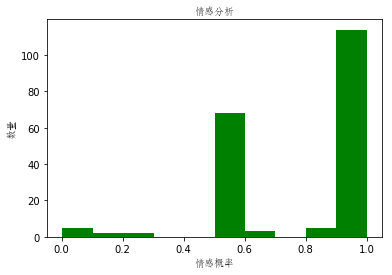

In [13]:
data_show()